## Plot experiment results

In [39]:
%matplotlib inline
from collections import OrderedDict
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


## Methods and filenames

In [2]:
runs = OrderedDict()

runs["truth"] = "truth_20200911_091636"
runs["mle"] = "mle_20200911_092100"
runs["random"] = "random_20200911_092105"
runs["greedy"] = "greedy_20200914_102725"
runs["beamsearch_s"] = "beamsearch_s_20200911_173430"
runs["beamsearch_m"] = "beamsearch_m_20200911_173434"
runs["beamsearch_l"] = "beamsearch_l_20200911_173439"
runs["beamsearch_xl"] = "beamsearch_xl_20200911_173443"
runs["mcts_xs"] = "mcts_nn_xs_20200914_110435"
runs["mcts_s"] = "mcts_nn_s_20200911_170739"
runs["mcts_m"] = "mcts_nn_m_20200911_172132"
runs["mcts_l"] = "mcts_nn_l_20200911_172057"

runs["mcts_raw"] = "mcts_raw_s_20200911_173335"
runs["mcts_onlybs"] = "mcts_only_bs_s_20200911_171817"
runs["mcts_nobs"] = "mcts_nn_no_beamsearch_s_20200911_170827"
runs["mcts_random"] = "mcts_random_s_20200911_173342"
runs["mcts_likelihood"] = "mcts_likelihood_s_20200911_170510"


In [3]:
labels = {}

labels["truth"] = "Truth"
labels["mle"] = "MLE"
labels["random"] = "Random"
labels["greedy"] = "Greedy"
labels["beamsearch_s"] = None
labels["beamsearch_m"] = None
labels["beamsearch_l"] = None
labels["beamsearch_xl"] = "Beam search"
labels["mcts_xs"] = None
labels["mcts_s"] = None
labels["mcts_m"] = None
labels["mcts_l"] = "MCTS"


In [4]:
cost_labels = {}

cost_labels["beamsearch_s"] = "Beam search"
cost_labels["random"] = "Random"
cost_labels["greedy"] = "Greedy"
cost_labels["mcts_xs"] = "MCTS"

In [6]:
colors = {}

colors["random"] = "black"
colors["truth"] = "black"
colors["mle"] = "black"

colors["greedy"] =  "#0A3D5C"
colors["beamsearch_s"] = "#3D708F"
colors["mcts_xs"] = "#F57547"

colors["beamsearch_m"] = colors["beamsearch_s"]
colors["beamsearch_l"] = colors["beamsearch_s"]
colors["beamsearch_xl"] = colors["beamsearch_s"]
colors["mcts_s"] = colors["mcts_xs"]
colors["mcts_m"] = colors["mcts_xs"]
colors["mcts_l"] = colors["mcts_xs"]


In [27]:
linestyles = {}

linestyles["truth"] = "-."
linestyles["mle"] = ":"
linestyles["random"] = ":"

linestyles["greedy"] = "--"

linestyles["beamsearch_s"] = "-."
linestyles["beamsearch_m"] = "-."
linestyles["beamsearch_l"] = "-."
linestyles["beamsearch_xl"] = "-."

linestyles["mcts_xs"] = "-"
linestyles["mcts_s"] = "-"
linestyles["mcts_m"] = "-"
linestyles["mcts_l"] = "-"


In [28]:
markers = {}

markers["beamsearch_s"] = "^"
markers["greedy"] = "s"
markers["mcts_xs"] = "o"


## Load results

In [29]:
n_jets = 500
run_dir = "./data/runs"

jet_sizes = np.nan * np.ones(n_jets)
log_likelihoods = {}
costs = {}

for key, run in runs.items():
    try:
        log_likelihoods[key] = np.load(f"{run_dir}/{run}/eval_log_likelihood.npy").flatten()
        jet_sizes = np.load(f"{run_dir}/{run}/eval_jet_sizes.npy")
    except Exception as e:
        print(e)
        log_likelihoods[key] = np.nan * np.ones(n_jets)
    
    try:
        costs[key] = np.load(f"{run_dir}/{run}/eval_likelihood_evaluations.npy").flatten()
    except Exception as e:
        print(e)
        costs[key] = np.nan * np.ones(n_jets)


[Errno 2] No such file or directory: './data/runs/truth_20200911_091636/eval_likelihood_evaluations.npy'
[Errno 2] No such file or directory: './data/runs/mle_20200911_092100/eval_likelihood_evaluations.npy'
[Errno 2] No such file or directory: './data/runs/random_20200911_092105/eval_likelihood_evaluations.npy'


## Normalize results

In [30]:
norm_key = "greedy"
rel_log_likelihoods = {}

for key, val in log_likelihoods.items():
    rel_log_likelihoods[key] = val - log_likelihoods[norm_key]


## Bin results

In [31]:
# n_bins = 5
# bin_boundaries = np.percentile(jet_sizes, np.linspace(0., 100., n_bins + 1)).astype(np.float)
# bin_boundaries[0] -= 0.01
# bin_boundaries[-1] += 0.01
bin_boundaries = [1.5] + list(np.arange(7.5, 17, 2)) + [20.5]


In [32]:
bin_jet_size = {}
bin_log_likelihood = {}
bin_log_likelihood_err = {}

for key in runs.keys():
    bin_jet_size_ = []
    bin_log_likelihood_ = []
    bin_log_likelihood_err_ = []
    
    for bin_min, bin_max in zip(bin_boundaries[:-1], bin_boundaries[1:]):
        x = jet_sizes[(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        y = rel_log_likelihoods[key][(jet_sizes >= bin_min) * (jet_sizes < bin_max)]
        bin_jet_size_.append(np.mean(x))
        bin_log_likelihood_.append(np.mean(y))
        bin_log_likelihood_err_.append(np.std(y) / (len(x)**0.5 + 1.e-9))
        
    bin_jet_size[key] = np.asarray(bin_jet_size_)
    bin_log_likelihood[key] = np.asarray(bin_log_likelihood_)
    bin_log_likelihood_err[key] = np.asarray(bin_log_likelihood_err_)


## Plots

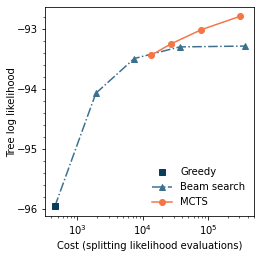

In [59]:
plot = [
    ["greedy"],
    ["beamsearch_s", "beamsearch_m", "beamsearch_l", "beamsearch_xl"],
    ["mcts_xs", "mcts_s", "mcts_m", "mcts_l"]
]

fig = plt.figure(figsize=(3.5,3.5))
ax = plt.gca()
    
for keys in plot:
    xs = [np.mean(costs[key]) for key in keys]
    ys = [np.mean(log_likelihoods[key]) for key in keys]
    c, m, ms, lbl = colors[keys[0]], markers[keys[0]], 6., cost_labels[keys[0]]
    ls =  linestyles[keys[0]] if len(xs) > 1 else " "
    
    # Include greedy in beam search
    if keys[0] == "beamsearch_s":
        plt.plot(
            [np.mean(costs["greedy"]), xs[0]],
            [np.mean(log_likelihoods["greedy"]), ys[0]],
            c=c, lw=1.5, ls=ls, zorder=-1
        )

    plt.plot(xs, ys, c=c, lw=1.5, ls=ls, marker=m, markersize=ms, label=lbl)

plt.legend(loc="lower right", frameon=False)

plt.xscale("log")
ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
plt.xlabel("Cost (splitting likelihood evaluations)")
plt.ylabel(f"Tree log likelihood", labelpad=0)

plt.subplots_adjust(left=0.16, bottom=0.16, right=0.99, top=0.99, wspace=0, hspace=0)
plt.savefig("figures/rl_ginkgo_log_likelihood_vs_cost.pdf")


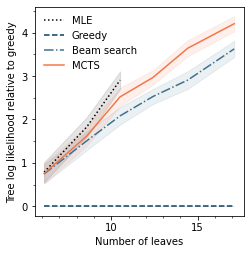

In [60]:
plot = ["mle", "greedy", "beamsearch_xl", "mcts_l"]

fig = plt.figure(figsize=(3.5,3.5))
ax = plt.gca()
    
for key in plot:
    x, y, dy = bin_jet_size[key], bin_log_likelihood[key], bin_log_likelihood_err[key]
    c, ls, lbl = colors[key], linestyles[key], labels[key]

    plt.fill_between(x, y-dy, y+dy, color=c, alpha=0.1)
    plt.plot(x, y, c=c, lw=1.5, ls=ls, label=lbl)

plt.legend(loc="upper left", frameon=False)

ax.yaxis.set_major_locator(MultipleLocator(1.))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
ax.xaxis.set_major_locator(MultipleLocator(5.))
ax.xaxis.set_minor_locator(MultipleLocator(1.))
plt.xlabel("Number of leaves")
plt.ylabel(f"Tree log likelihood relative to {norm_key}")

plt.subplots_adjust(left=0.16, bottom=0.16, right=0.99, top=0.99, wspace=0, hspace=0)
plt.savefig("figures/rl_ginkgo_log_likelihood_vs_leaves.pdf")


## All results

In [67]:
for key, val in log_likelihoods.items():
    mean = np.mean(val)
    err = np.std(val)/len(val)**0.5
    print(
        f"{key:>20.20}: ${mean:7.2f} "
        + f"\\textcolor{{dark-grey}}{{\pm {err:4.2f}}}$"
    )
          

               truth: $ -99.26 \textcolor{dark-grey}{\pm 1.12}$
                 mle: $    nan \textcolor{dark-grey}{\pm  nan}$
              random: $-202.23 \textcolor{dark-grey}{\pm 4.95}$
              greedy: $ -95.96 \textcolor{dark-grey}{\pm 1.06}$
        beamsearch_s: $ -94.07 \textcolor{dark-grey}{\pm 1.04}$
        beamsearch_m: $ -93.49 \textcolor{dark-grey}{\pm 1.03}$
        beamsearch_l: $ -93.30 \textcolor{dark-grey}{\pm 1.02}$
       beamsearch_xl: $ -93.28 \textcolor{dark-grey}{\pm 1.02}$
             mcts_xs: $ -93.44 \textcolor{dark-grey}{\pm 1.02}$
              mcts_s: $ -93.25 \textcolor{dark-grey}{\pm 1.02}$
              mcts_m: $ -93.01 \textcolor{dark-grey}{\pm 1.02}$
              mcts_l: $ -92.79 \textcolor{dark-grey}{\pm 1.02}$
            mcts_raw: $ -93.76 \textcolor{dark-grey}{\pm 1.04}$
         mcts_onlybs: $ -93.85 \textcolor{dark-grey}{\pm 1.04}$
           mcts_nobs: $ -95.20 \textcolor{dark-grey}{\pm 1.07}$
         mcts_random: $ -93.85 \textcolo